In [1]:
import glyco as gl
import glob
import pandas as pd
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [17]:
for i in range(n_iter):
    m = min(n, key=lambda x: abs(x - pivot))
    q=df.loc[m][col]
    if type(q)==pd.Series:
        q=q[0]
    if pd.isna(q):
        n.remove(m)
    else:
        return m

SyntaxError: 'return' outside function (<ipython-input-17-df8154bf8278>, line 9)

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
folder_path = 'data/fast/' 
glob.glob('{}*.csv'.format(folder_path))

['data/fast/glucose_gal.csv',
 'data/fast/glucose_joh.csv',
 'data/fast/glucose_ism.csv',
 'data/fast/glucose_adm.csv']

# Load all files as one DF

In [18]:
start = '2020-11-10'
end = '2020-11-25' 

start_fast = '2020-11-17 16:00'
end_fast = '2020-11-20 12:00'



In [19]:
folder_path = 'data/fast/'
D=gl.Devices.ABBOTT 
G_LBL = gl.G_LBL
T_LBL = gl.T_LBL

dfs = []
patients = []
for file_path in glob.glob('{}*.csv'.format(folder_path)):
    with open(file_path) as f:
        patient_name = f.readline().split(',')[-1].split(' ')[0].strip()
    df = gl.read_from_csv(file_path, device=D, rolling_avg=2).loc[start:end]
    df['patient'] = patient_name
    df = df.set_index(['patient', 't'])
    df['t'] = df.index.get_level_values(1)
    df['pid'] = df.index.get_level_values(0)
    dfs.append(df)
    patients.append(patient_name)
df = pd.concat(dfs)


# Limit period

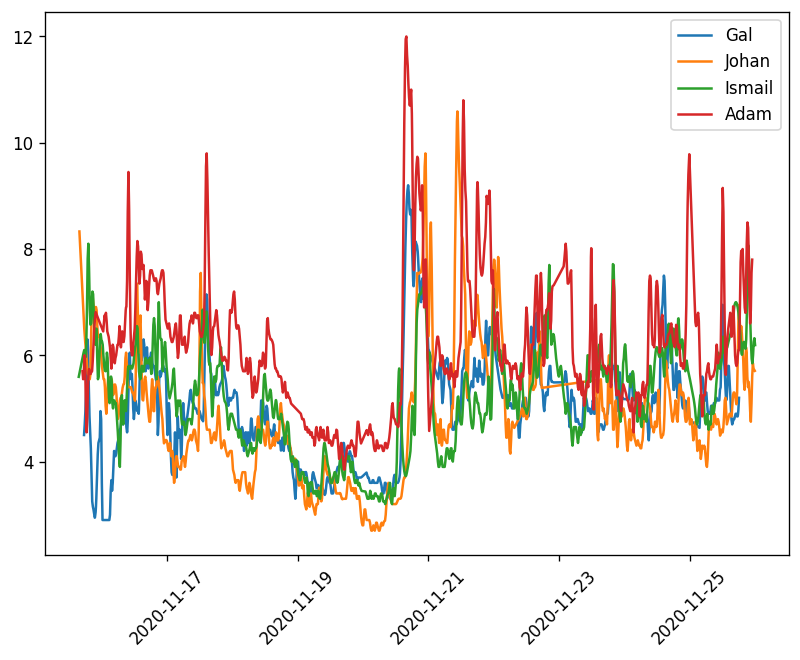

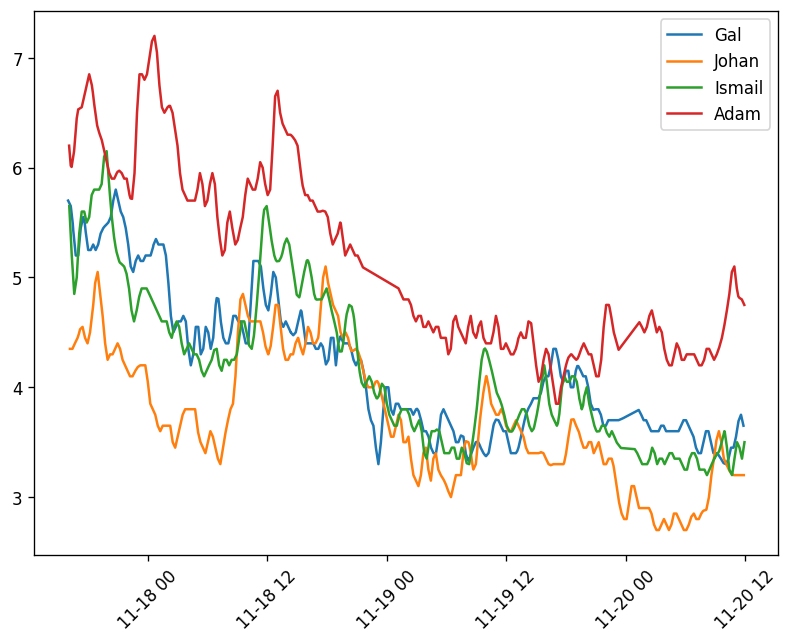

In [20]:
s, e = start, end
gl.plot_compare_multi(df, s, e, patients)
s, e = start_fast, end_fast
gl.plot_compare_multi(df, s, e, patients)

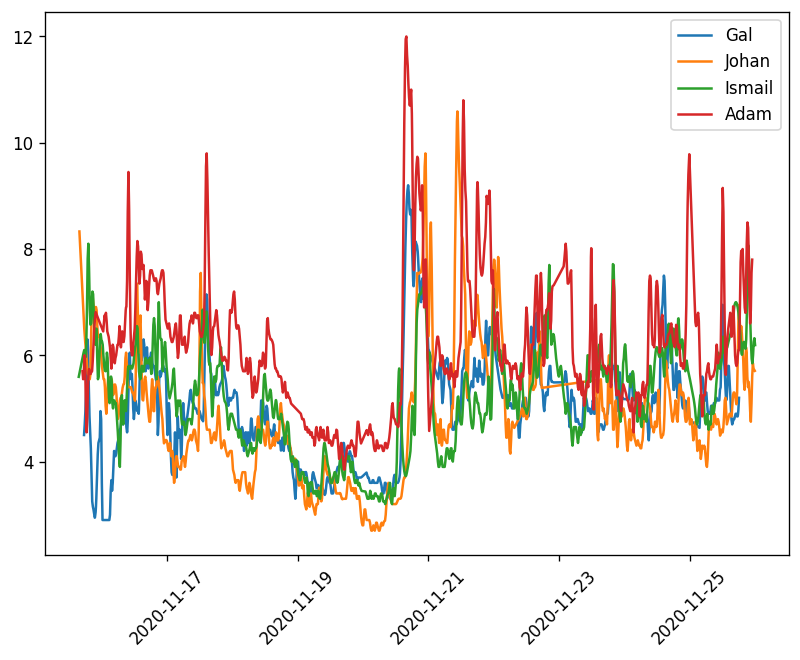

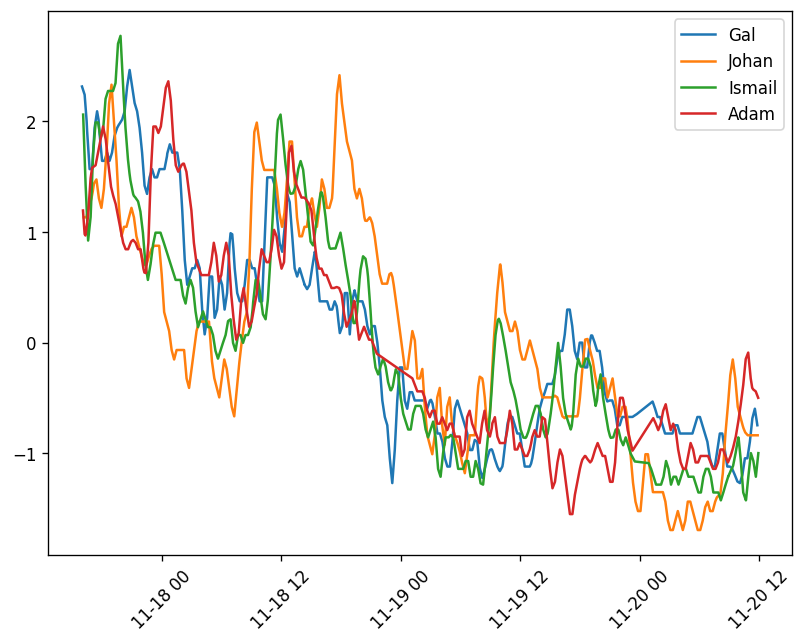

In [21]:
s, e = start, end
gl.plot_compare_multi(df, s, e, patients)
s, e = start_fast, end_fast
gl.plot_compare_multi(df, s, e, patients, normalize=True)

Gal 4.890770672987871 2020-11-15 2020-11-25
Johan 4.949999999999986 2020-10-03 2020-11-29
Ismail 4.8240078883141 2019-12-05 2020-11-28
Adam 5.611496504496273 2020-11-15 2020-11-25


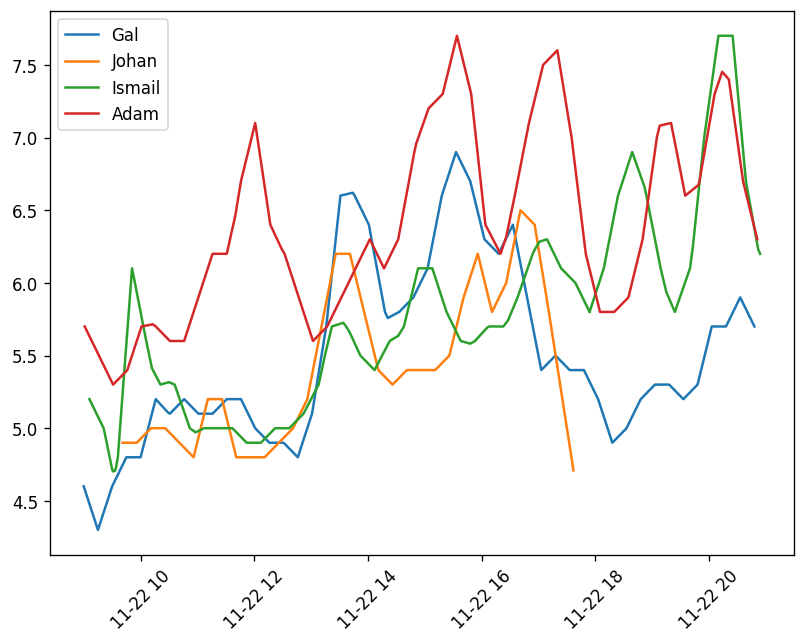

In [295]:

s, e = '2020-11-22 09:00:00', '2020-11-22 21:00:00'
gl.plot_compare_multi(df, s, e, patients)

# FFT Filter

No handles with labels found to put in legend.


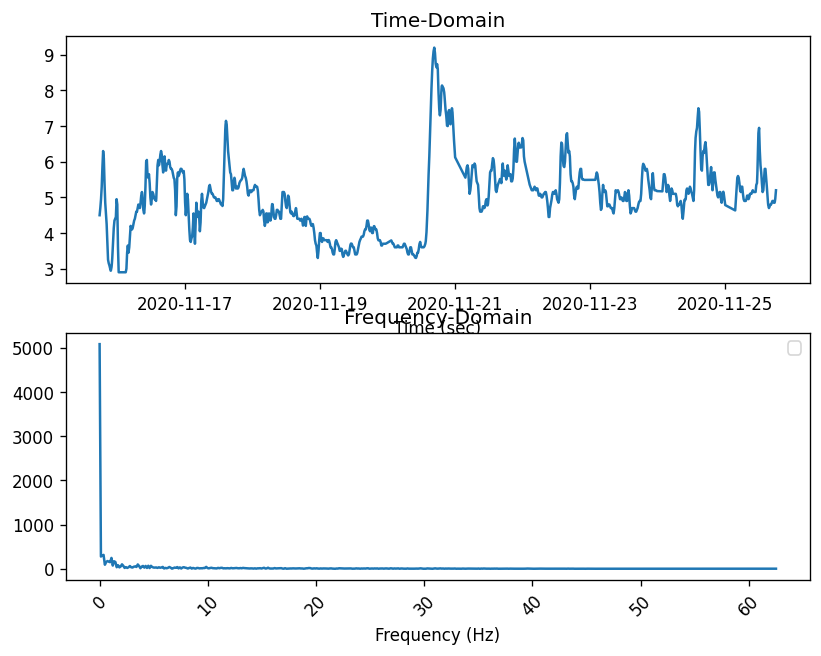

In [299]:
gals = df.loc['Gal'][df.loc['Gal'][G_LBL].notna()]
gl.plot_fft(gals[G_LBL], gals[T_LBL])

No handles with labels found to put in legend.


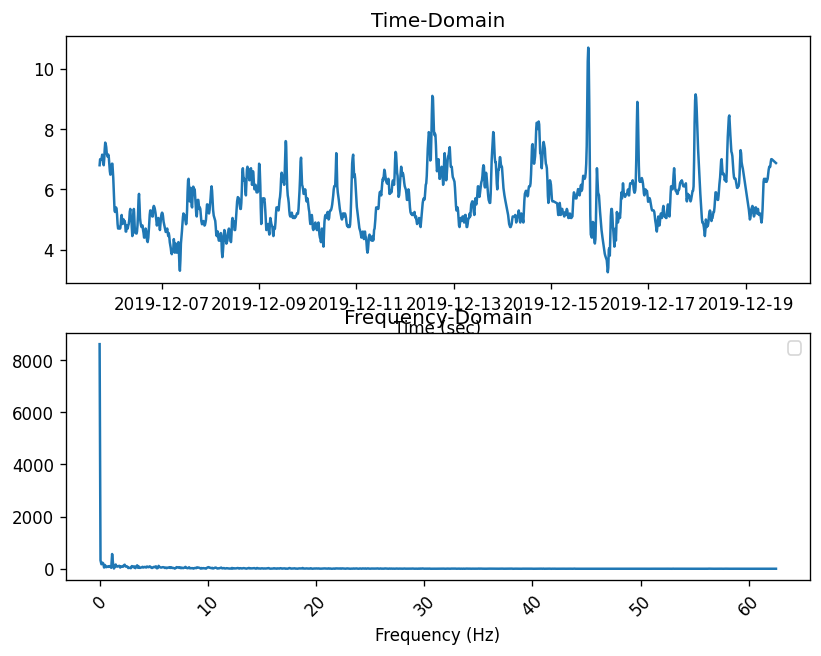

No handles with labels found to put in legend.


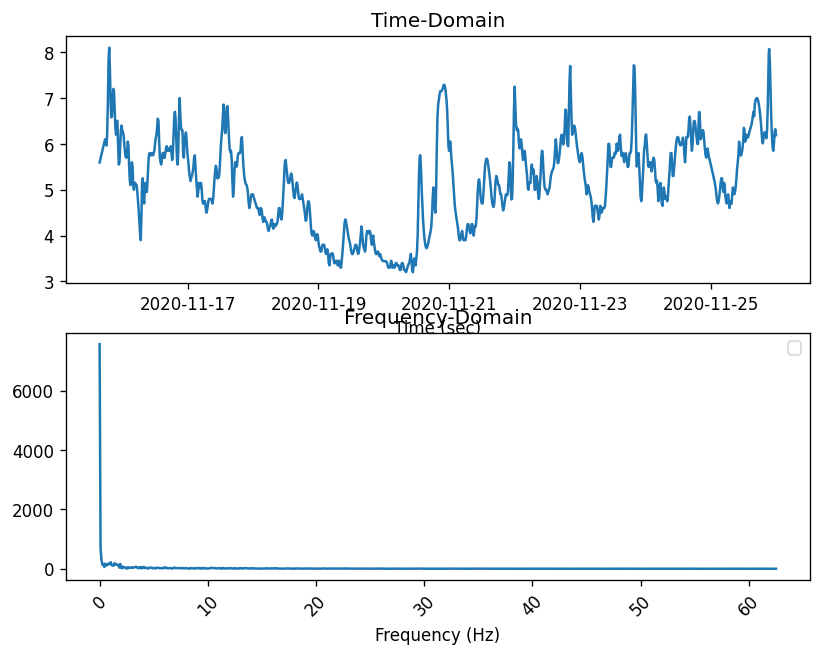

In [300]:
ismail_reg = df.loc['Ismail'].loc['2019'][df.loc['Ismail'].loc[:'2019'][G_LBL].notna()]
ismail_fast = df.loc['Ismail'].loc[start:end][df.loc['Ismail'].loc[start:end][G_LBL].notna()]
gl.plot_fft(ismail_reg[G_LBL], ismail_reg[T_LBL])
gl.plot_fft(ismail_fast[G_LBL], ismail_fast[T_LBL])

Gal 3.6294828775715233 2020-11-15 2020-11-25
Johan 3.3814944543321963 2020-11-15 2020-11-25
Ismail 5.705968759046017 2020-11-15 2020-11-25
Adam 5.259808715761253 2020-11-15 2020-11-25


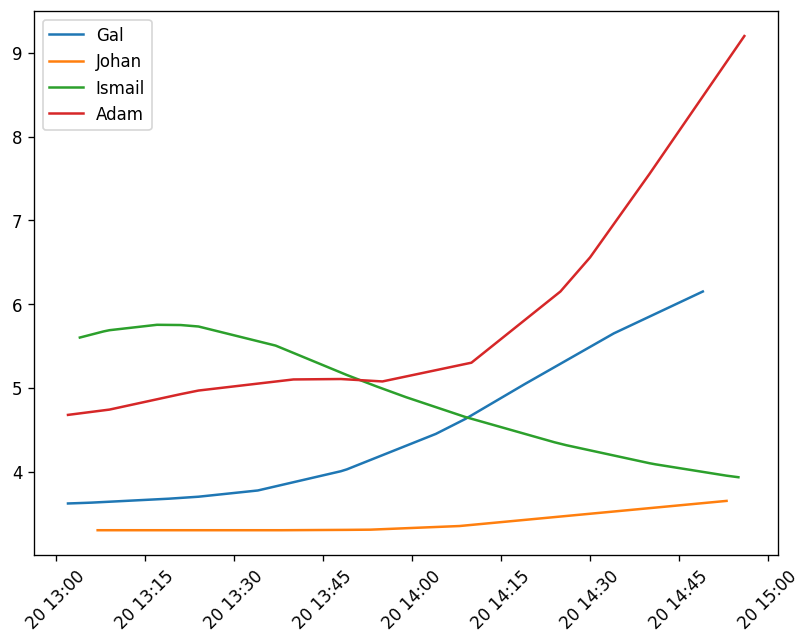

In [419]:
s, e = '2020-11-20 13:00', '2020-11-20 15:00'
gl.plot_compare_multi(df, s, e, patients)


True

# Analysis Goals
* Glycemic variability when breaking fast (insulin resistance)
* Compare before vs. after fast
* Subjective feeling

# Plot curves compare

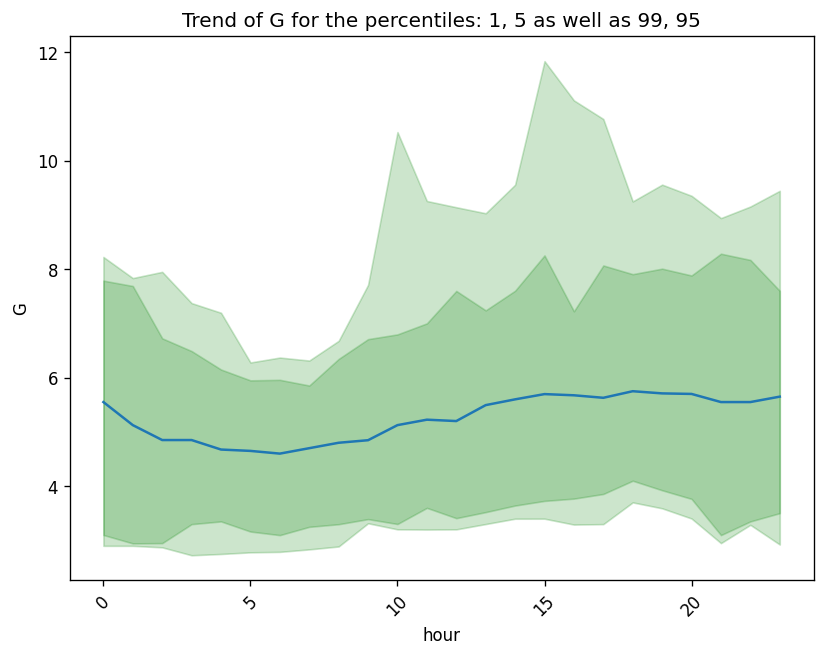

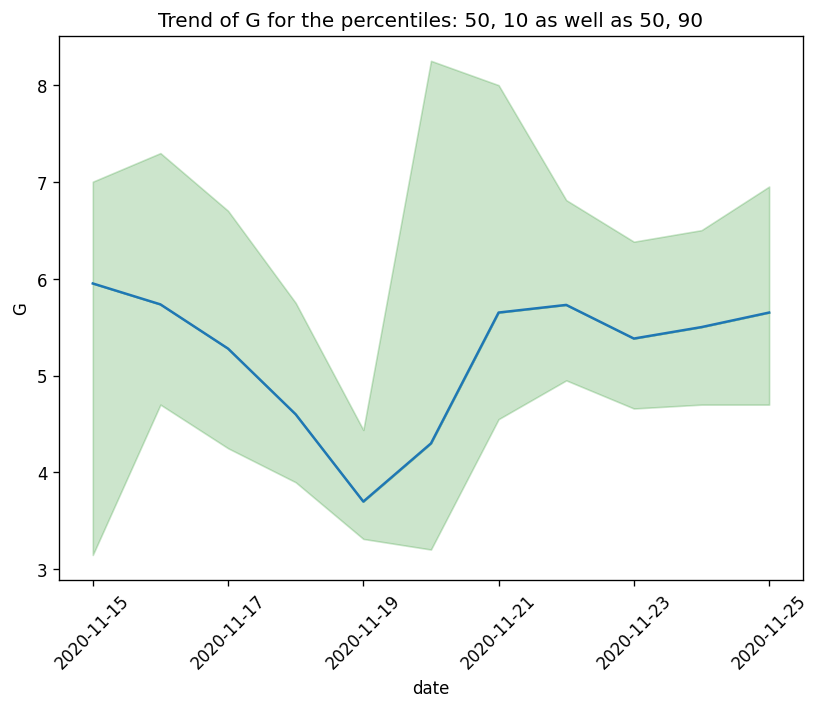

No handles with labels found to put in legend.


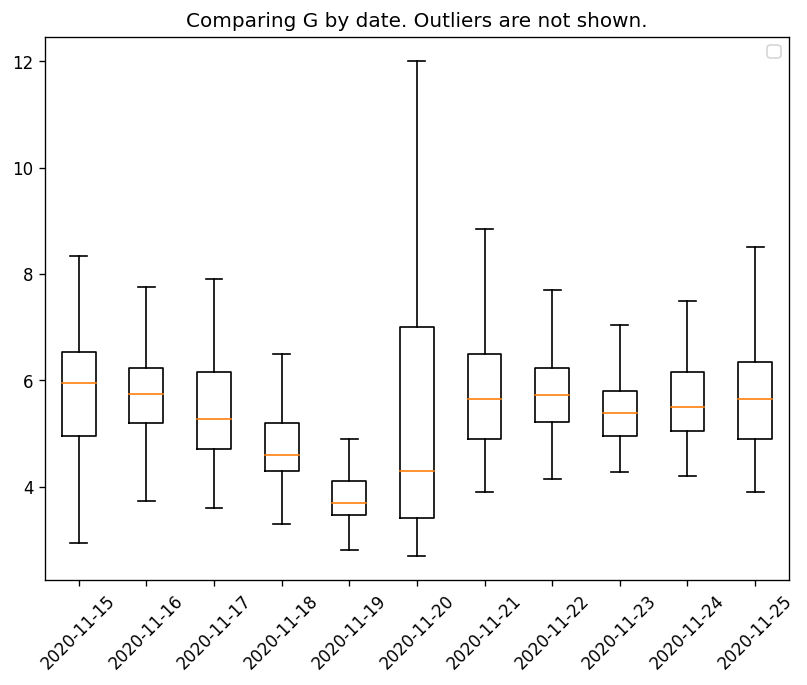

In [323]:
gl.plot_day_trend(df, G_LBL)
gl.plot_percentiles(df, G_LBL, percentiles=[.5,.1], group_by='date')
gl.plot_box_comparison(df, G_LBL, compare_by='date')

### Add labels for in/out Fast

In [353]:
df['fasting'] = ((df['t'] > start_fast) & (df['t'] < end_fast)).map(lambda x: 1 if x else 0)


In [354]:
gender_map = lambda x: 'F' if x=='Gal' else 'M'
df['gender']=df.pid.map(gender_map)

No handles with labels found to put in legend.


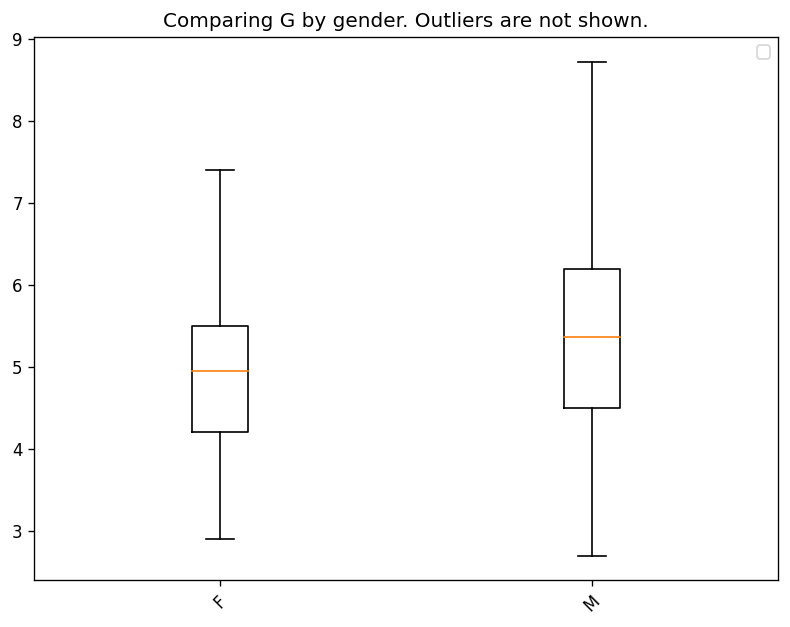

In [356]:
gl.plot_box_comparison(df, compare_by='gender')

No handles with labels found to put in legend.


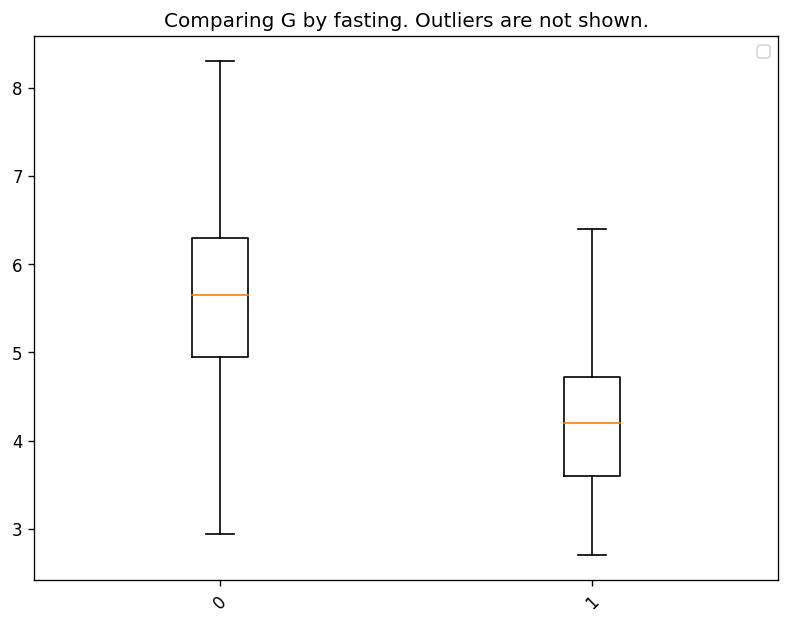

In [359]:
gl.plot_box_comparison(df, compare_by='fasting')

In [368]:
df[df['session_start']].rank(method='first').astype(int)
df[df['fasting'].diff()>0]

,,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,dg,dt,dg_dt,auc_mean,auc_lim,auc_min,t,pid,fasting,gender
patient,t,,,,,,,,,,,,,,,,,,,,,
Gal,2020-11-17 16:01:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,17-11-2020 16:01,0,5.6,NaN,NaN,NaN,NaN,NaN,...,-0.2,900.0,-0.000222,549.040179,0.0,2430.0,2020-11-17 16:01:00,Gal,1,F
Johan,2020-11-17 16:12:00,FreeStyle LibreLink,45a527ff-65e1-4555-9235-c5e0c58effee,17-11-2020 16:12,0,4.3,NaN,NaN,NaN,NaN,NaN,...,-0.1,900.0,-0.000111,0.000000,0.0,1440.0,2020-11-17 16:12:00,Johan,1,M
Ismail,2020-11-17 16:08:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,17-11-2020 16:08,0,5.5,NaN,NaN,NaN,NaN,NaN,...,-0.3,900.0,-0.000333,181.462016,0.0,2970.0,2020-11-17 16:08:00,Ismail,1,M
Adam,2020-11-17 16:07:00,FreeStyle LibreLink,DD5B3D15-46C6-4301-8B8E-278591C47FF7,17-11-2020 16:07,0,5.9,NaN,NaN,NaN,NaN,NaN,...,-0.6,900.0,-0.000667,0.000000,0.0,1890.0,2020-11-17 16:07:00,Adam,1,M


In [391]:
df['date_str']=df.date.map(lambda x: str(x))

No handles with labels found to put in legend.


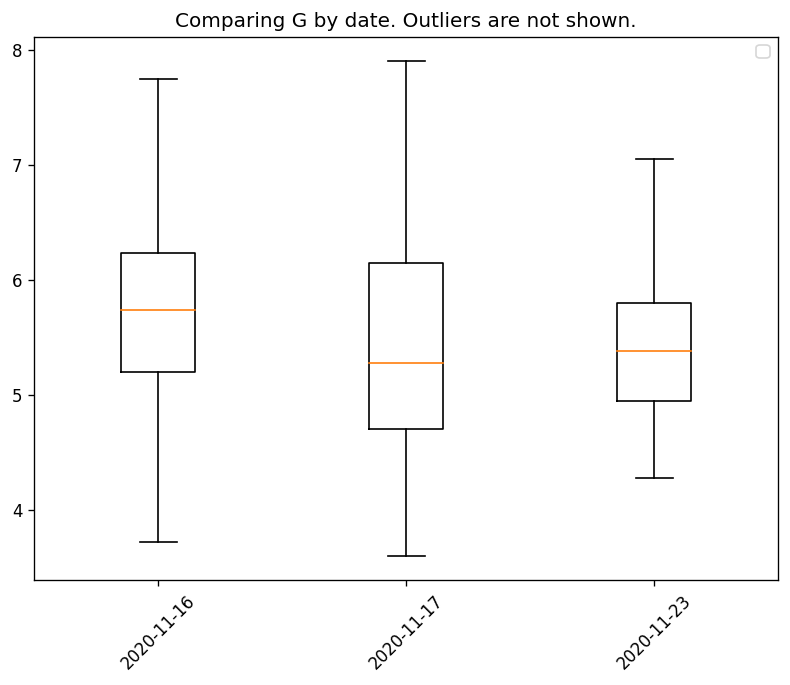

In [398]:
pre_fast_day = '2020-11-16'
post_fast_day = '2020-11-23'
gl.plot_box_comparison(df[(df.date_str == pre_fast_day) |(df.date_str == '2020-11-17') | (df.date_str==post_fast_day)], compare_by='date')

In [416]:
pre_fast_all = ['2020-11-16', '2020-11-17']
during_fast = ['2020-11-18', '2020-11-19']

breaking_day = ['2020-11-20']
post_fast_all = ['2020-11-22', '2020-11-23', '2020-11-24']
df['stage'] = df.date_str.map(lambda x: 'before' if x in pre_fast_all 
else 'after' if x in post_fast_day 
else 'during' if x in during_fast 
else 'breaking fast' if x in breaking_day 
else 'None')

No handles with labels found to put in legend.


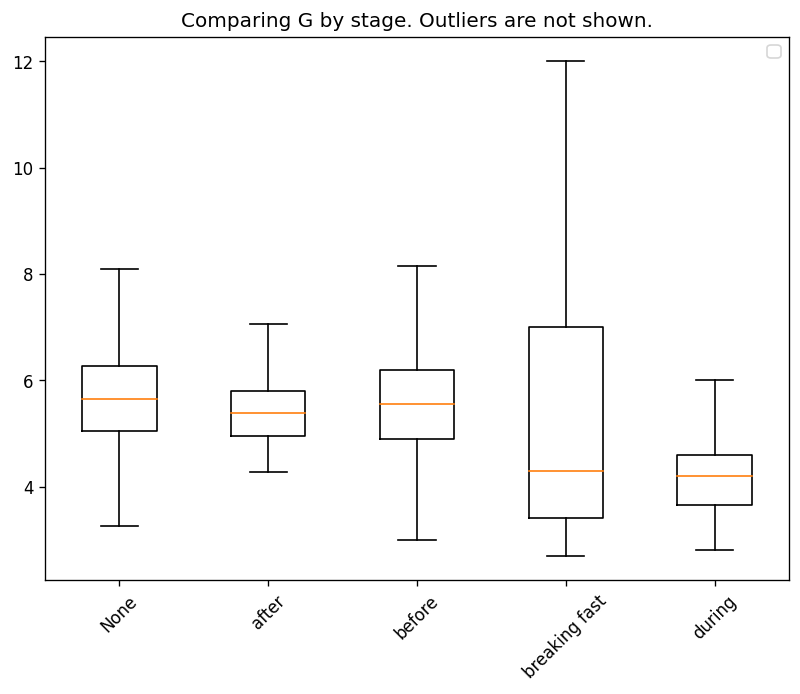

In [417]:
gl.plot_box_comparison(df, compare_by='stage')

In [337]:
df['t']>start

patient  t                  
Gal      2020-11-15 17:35:00    True
         2020-11-15 17:50:00    True
         2020-11-15 18:05:00    True
         2020-11-15 18:20:00    True
         2020-11-15 18:35:00    True
                                ... 
Adam     2020-11-25 21:55:00    True
         2020-11-25 22:10:00    True
         2020-11-25 22:25:00    True
         2020-11-25 22:40:00    True
         2020-11-25 22:55:00    True
Name: t, Length: 4510, dtype: bool

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,G,dg,dt,dg_dt,auc_mean,auc_lim,auc_min,t,pid,fasting
t,,,,,,,,,,,,,,,,,,,,,
2020-11-15 17:35:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,15-11-2020 17:35,0,4.6,NaN,NaN,NaN,NaN,NaN,...,4.50,0.2,900.0,0.000222,0.000000,0.0,1530.0,2020-11-15 17:35:00,Gal,False
2020-11-15 17:50:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,15-11-2020 17:50,0,4.8,NaN,NaN,NaN,NaN,NaN,...,4.70,0.2,900.0,0.000222,0.000000,0.0,1710.0,2020-11-15 17:50:00,Gal,False
2020-11-15 18:05:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,15-11-2020 18:05,0,5.1,NaN,NaN,NaN,NaN,NaN,...,4.95,0.3,900.0,0.000333,99.040179,0.0,1980.0,2020-11-15 18:05:00,Gal,False
2020-11-15 18:20:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,15-11-2020 18:20,0,5.5,NaN,NaN,NaN,NaN,NaN,...,5.30,0.4,900.0,0.000444,459.040179,0.0,2340.0,2020-11-15 18:20:00,Gal,False
2020-11-15 18:35:00,FreeStyle LibreLink,EA382358-C21B-49CD-8BAF-43C839F966DB,15-11-2020 18:35,0,6.2,NaN,NaN,NaN,NaN,NaN,...,5.85,0.7,900.0,0.000778,1089.040179,180.0,2970.0,2020-11-15 18:35:00,Gal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25 21:55:00,FreeStyle LibreLink,DD5B3D15-46C6-4301-8B8E-278591C47FF7,25-11-2020 21:55,0,6.7,NaN,NaN,NaN,NaN,NaN,...,7.10,-0.8,900.0,-0.000889,434.682981,630.0,2610.0,2020-11-25 21:55:00,Adam,False
2020-11-25 22:10:00,FreeStyle LibreLink,DD5B3D15-46C6-4301-8B8E-278591C47FF7,25-11-2020 22:10,0,6.5,NaN,NaN,NaN,NaN,NaN,...,6.60,-0.2,900.0,-0.000222,254.682981,450.0,2430.0,2020-11-25 22:10:00,Adam,False
2020-11-25 22:25:00,FreeStyle LibreLink,DD5B3D15-46C6-4301-8B8E-278591C47FF7,25-11-2020 22:25,0,7.2,NaN,NaN,NaN,NaN,NaN,...,6.85,0.7,900.0,0.000778,884.682981,1080.0,3060.0,2020-11-25 22:25:00,Adam,False


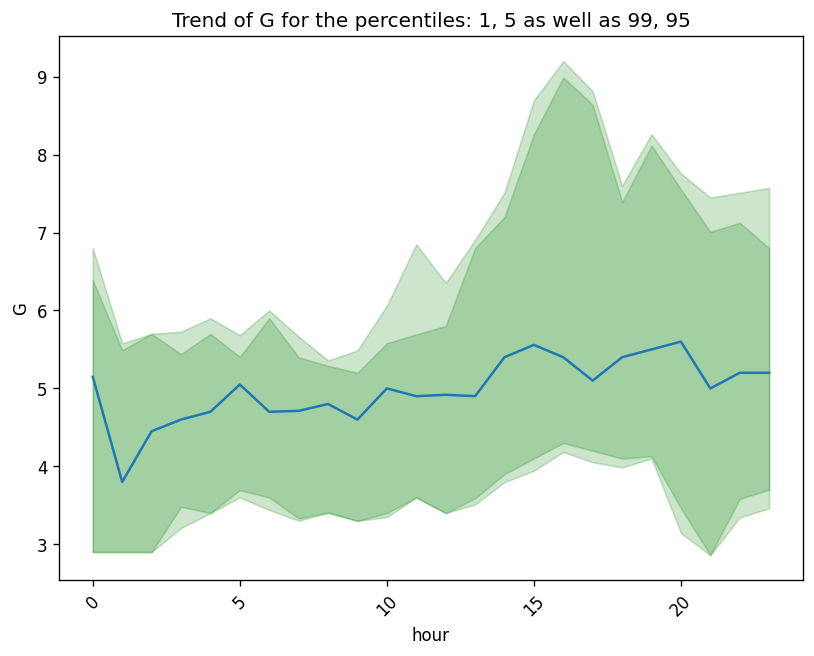

In [ ]:
gl.plot_day_trend(df, glbl=gl.G_LBL)

# Meals

import meals as ml

In [421]:
import meal as ml

In [6]:
%load_ext autoreload
%autoreload 2

In [10]:
import utils as ut

In [11]:
ml.read_meals(folder_path+'meals_gal/')

NameError: name 'ml' is not defined

In [12]:
from datetime import datetime as dt

In [14]:
ut.find_nearest(df, dt.today())

NameError: name 'df' is not defined

In [426]:
folder_path

'data/fast/'